In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

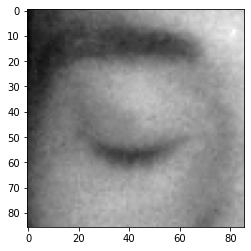

In [2]:
img_array = cv2.imread("EyesDataset/CloseEyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

In [3]:
img_array.shape

(86, 86)

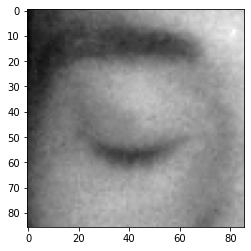

[[38 41 44 ... 89 89 89]
 [38 41 44 ... 92 92 91]
 [38 41 43 ... 94 93 93]
 ...
 [52 54 60 ... 78 78 80]
 [51 53 59 ... 81 81 81]
 [51 51 55 ... 80 80 82]]


In [4]:
dir_file = "EyesDataset/"
classes = ["CloseEyes", "opened_eyes"]
for category in classes: # there are to categories
    path = os.path.join(dir_file,category) # create path to dogs and cats
    for img in os.listdir(path): # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
        backtorgb=cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray") # graph it
        plt.show() # display!
        break # we just want one for now so break
    break #…and one more!
print(img_array)

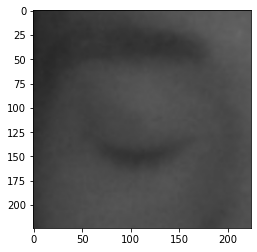

In [5]:
img_size = 224 #imagenet
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [6]:
training_data = []  #data
def create_training_data():
    for category in classes: # do close eyes and opened eyes
        path = os.path.join(dir_file,category) # create path to close eyes and open eyes
        class_num = classes.index(category) # (label)get the classification (0 or a 1). 0=close eyes 1=open eyes
        for img in os.listdir(path): # iterate over each image per close eyes and open eyes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # convert to array
                backtorgb=cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size)) # resize to normalize data size
                training_data.append([new_array, class_num]) # add this to our training_data
            except Exception as e: # in the interest in keeping the output clean…
                pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

2067


In [9]:
import random
random.shuffle(training_data) #to avoid overfitting
for sample in training_data[:10]:
    print(sample[1])
X = [] #data
y = [] #label
for features,label in training_data:
    X.append(features)
    y.append(label)
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, img_size,img_size, 3)

0
1
0
0
1
0
1
1
1
1


In [10]:
X.shape

(2067, 224, 224, 3)

In [12]:
X=X/255.0; #normalizing the data

In [10]:
Y = np.array(y)

In [14]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
model=tf.keras.applications.mobilenet.MobileNet()

In [12]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [13]:
inp=model.layers[0].input

In [14]:
oup=model.layers[-4].output

In [15]:
#flatten the layer
Flat_Layer=layers.Flatten()(oup)
final_output=layers.Dense(1)(Flat_Layer) # one node(1/0)
final_oup=layers.Activation('sigmoid')(final_output)

In [16]:
new_model=keras.Model(inputs=inp, outputs=final_output)

In [17]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [18]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
new_model.fit(X,Y, epochs=16,validation_split=0.1) 

Epoch 1/16
59/59 [==============================] - 1999s 24s/step - loss: 2.8039 - accuracy: 0.7885 - val_loss: 7.3837 - val_accuracy: 0.5169
Epoch 2/16
59/59 [==============================] - 629s 10s/step - loss: 3.0624 - accuracy: 0.7959 - val_loss: 4.6308 - val_accuracy: 0.6908
Epoch 3/16
59/59 [==============================] - 708s 12s/step - loss: 2.7342 - accuracy: 0.8121 - val_loss: 2.9764 - val_accuracy: 0.8019
Epoch 4/16
59/59 [==============================] - 990s 16s/step - loss: 4.8553 - accuracy: 0.6724 - val_loss: 3.7834 - val_accuracy: 0.7488
Epoch 5/16
59/59 [==============================] - 734s 11s/step - loss: 3.5447 - accuracy: 0.7638 - val_loss: 2.3902 - val_accuracy: 0.8357
Epoch 6/16
59/59 [==============================] - 675s 11s/step - loss: 2.1113 - accuracy: 0.8506 - val_loss: 7.0100 - val_accuracy: 0.5459
Epoch 7/16
59/59 [==============================] - 780s 12s/step - loss: 1.8321 - accuracy: 0.8718 - val_loss: 5.2907 - val_accuracy: 0.6570
Epoch

In [19]:
new_model.save("drowsinessE16.h5") 

In [19]:
new_model=tf.keras.models.load_model("drowsinessE16.h5")

In [20]:
#img_array=cv2.imread('s0012_07656_0_0_1_1_0_02.png',cv2.IMREAD_GRAYSCALE)
img_array=cv2.imread('s0018_01072_0_0_0_0_1_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [21]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [22]:
X_input.shape

(1, 224, 224, 3)

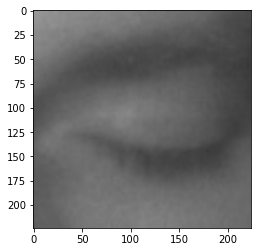

In [23]:
plt.imshow(new_array)

In [24]:
X_input=X_input/255.0

In [25]:
prediction = new_model.predict(X_input)
print(prediction,'\n')  # will be a list in a list.

[[0.85146713]] 



In [27]:
imge=cv2.imread('img1.jpg')

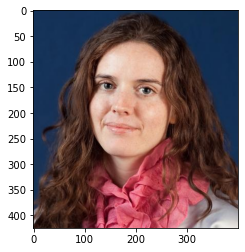

In [28]:
plt.imshow(cv2.cvtColor(imge, cv2.COLOR_BGR2RGB))

In [29]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [30]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [31]:
gray=cv2.cvtColor(imge, cv2.COLOR_BGR2GRAY)

In [32]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [33]:
for(x, y, w, h) in eyes:
    cv2.rectangle(imge,(x,y), (x+w, y+h), (0,255,0), 2)

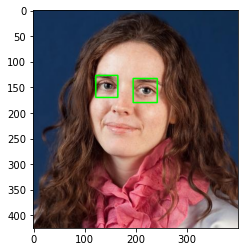

In [34]:
plt.imshow(cv2.cvtColor(imge, cv2.COLOR_BGR2RGB))

In [35]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray=cv2.cvtColor(imge,cv2.COLOR_BGR2RGB)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=imge[y:y+h, x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]

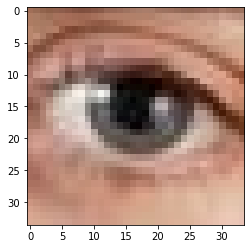

In [36]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [37]:
eyes_roi.shape

(34, 34, 3)

In [38]:
final_img=cv2.resize(eyes_roi, (224,224))
final_img=np.expand_dims(final_img, axis=0)
final_img=final_img/255.0

In [39]:
final_img.shape

(1, 224, 224, 3)

In [40]:
pred=new_model.predict(final_img)
print(pred)

[[1.74138]]


In [43]:
import cv2
import numpy as np
path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

cap=cv2.VideoCapture(1)
##check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) ==0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0

    Predictions=new_model.predict(final_image)
    if(Predictions>0):
        status="Open Eyes"
    else:
        status="Closed Eyes"
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)

  ##Draw a rectangle around the faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font=cv2.FONT_HERSHEY_SIMPLEX

  ##use putText() for inserting text on video
    cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)

    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 

False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
eyes are not detected
False
eyes a

In [ ]:
import winsound
frequency = 2500
duration = 1000
import cv2
import numpy as np
path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

cap=cv2.VideoCapture(1)
##check if the webcam is opened correctly
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter=0

while True:
    ret, frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye_tree_eyeglasses.xml")
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for(ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
                
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    
    #Draw a rectangle around the faces
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    Predictions=new_model.predict(final_image)
    if(Predictions>0):
        status="Open Eyes"
        
        cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        
        cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
        cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,255,0),2)
        
    else:
        counter = counter + 1
        status="Closed Eyes"
        cv2.putText(frame,status,(150,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter>5:
            
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame, 'sleep alert !!', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7, (0,0,255),2)
            winsound.Beep(frequency, duration)
            #winsound.PlaySound('beep-01a.wav', winsound.SND_FILENAME)
            counter = 0
        
    
    cv2.imshow('Drowsiness Detection',frame)
    
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break


cap.release()
cv2.destroyAllWindows() 

False
False
eyes are not detected
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
False
False
False
